**Remembert that we have to always include step one, two, and three of last week's lecture. Why? Because we are using the free version of Google Colab.**

In [1]:
#Step 1: Install Dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

#Step 2: Add environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"

#Step 3: Initialize Pyspark
import findspark
findspark.init()

In [3]:
#creating spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

# **DataFrames and SPARKSQL**

We have talked about Pyspark, we have talked about RDDs, today we are going to introduce one of the most important and powerful features in Spark named Spark SQL. 

## **Dataframes**

Before we talk about SparkSQL, let us talk about its younger sibling, DataFrames. 

Inspired by Pandas in structure, format, and a few specific operations, Spark DataFrames are like distributed tables with named columns, and with a schema, where each column has a specific data type (integer, string, array, map, real, date, timestamp, etc). To the human’s eye, a Spark DataFrame is like a table.


When data is visualized as a structured table, it’s not only easy to digest but it’s easy to work with on common operations you may want to execute on rows and columns. Like RDDs, DataFrames are immutable,and as with RDDs, Spark keeps a lineage of all transformations, even with the columns. 

A named column in a DataFrame and its associated Spark data type can be declared in a **schema**.
And just like with any other spark components, dataframes rely on lazy evaluation, meaning that there is always a trigger or a set of action before any transformation happens.

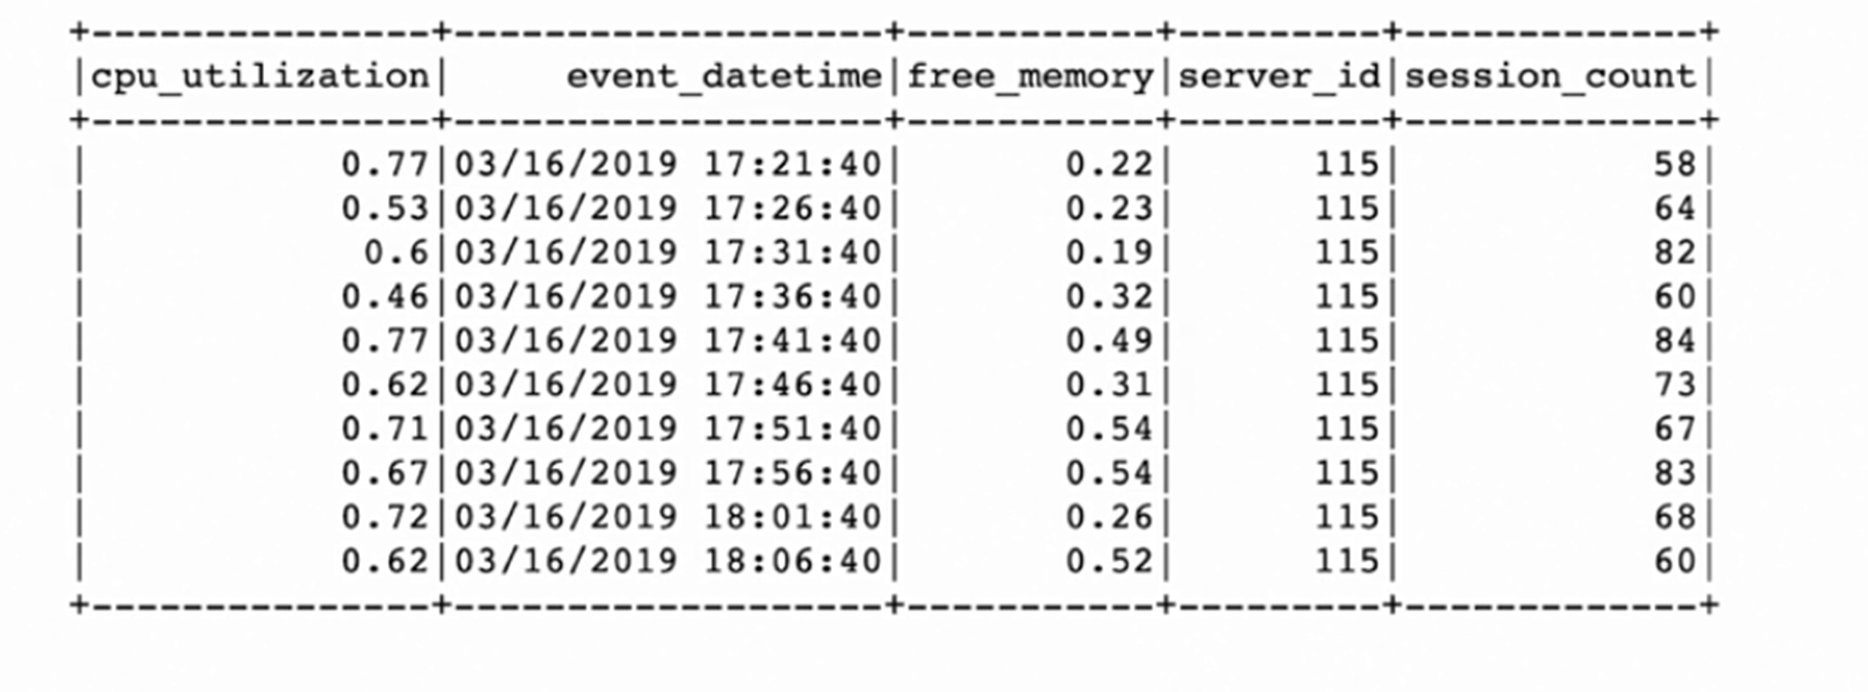

Above is an example of what a data looks like, thsi example is composed of time series data which shows some basic performance monitoring data. For example if you were monitoring one of the servers of a cluster, you may want to know its CPU utilization, the amount of free memory available,or the number of sessions connected to this particular server

On thing to keep in mind is that DataFrames have specific structures. Just like relational database tables, there is s a formal structure. Below is the structure, or schema, for the time series data we just saw. And like with database tables, we can have a mix of data types. In this case, we have doubles, which are a type of floating point. We have strings for the date time. And we have some long intergers, for example the server ID, and the session counts.

To get the schema of a dataframe. we have to use the printSchema method. 

*df.printSchema()*
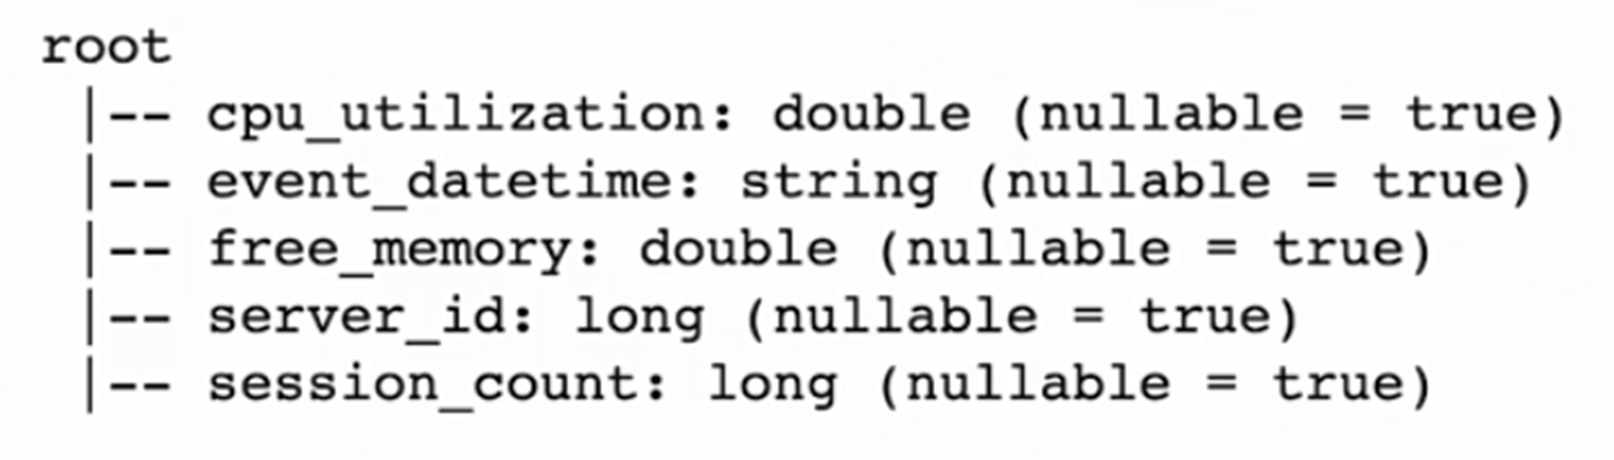

### **Reading into Dataframes**


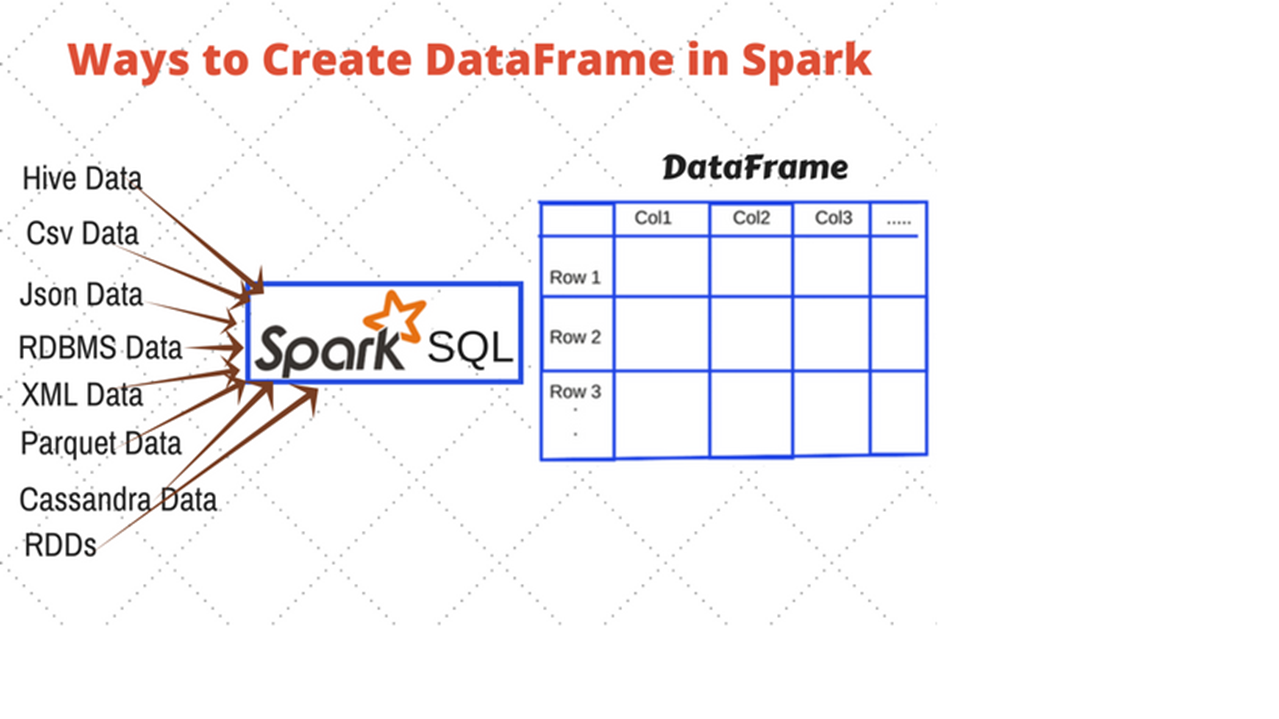

To perform common data operations on a DataFrame, you’ll first need to connect to a data source that holds your structured data. Spark provides an interface, DataFrameReaders 20 to read data into a DataFrame from a myriad of data sources and formats such as JSON, CSV, Parquet, Text, Avro, ORC etc.

Once the entire distributed DataFrame is in memory, the first thing we should do as data engineers and scientists,  is to  examine our data: see what the columns look like, are they of the correct data type? Do they need conversion to the right data type? Do they have null values etc


### **Working with DataFrames**

There are a couple of different ways of working with DataFrames. The first one is to use the DataFrame API that is structured around using methods on DataFrame objects. For example, let's assume we have a DataFrame called df for short. There is a method on the DataFrame object called select. We can use the select method on a column by putting the column name in double quotes, and passing that to the select method. 
For example, If we have a DataFrame called df, we can call the select method (Transformation), and ask for the name column. If we also want to print the results, we can call the (dot).show (action) method to do so. 

 ***df.select("name").show()***
 
 ***df.groupBy("age").count().show()***

Just like in SQL, We can use methods such as groupby to group by a particular column, or count etc... 

The second way of working with DataFrames is by using Spark SQL. Spark SQL allows you to enter SQL queries, which are executed on DataFrames. And those DataFrames are registered as tables. For example, we can have an explicit string that says, SELECT name FROM a table called PEOPLE that we use as arguments to the spark.sql method. 

**spark.sql("SELECT name FROM people_sql")**

**spark.sql("SELECT count(*)**
			     **FROM people_sql**
				   **GROUP BY age")**

The second example which is similar to what we previously saw, has a SELECT statement which returns the count of the number of rows in each group where a group is grouped by age. So you have the option when working with DataFrames to use a more object oriented approach, using methods and functions on the objects, or you can use SQL, by passing strings of select statements.


## **SparkSQL**

Spark SQL provides an engine upon which high-level abstraction structured APIs such as DataFrames and Datasets are built on. It can read and write data in a variety of structured formats such JSON, Hive Tables, Parquet, Avro, ORC, CSV, etc...
It also lets you query data using the  connectors from the external Business Intelligence data sources such as Tableau, Power BI, Talend or Relational Database Management Systems (RDBMS) such as MySQL, PostgreSQL, etc.

It has a programmatic interface to interact with structured data stored as tables or views in a database from a Spark application.

Best of all, It offers an interactive shell to issue SQL queries to your structured data.

### **SparkSQL: Tables**

Tables hold data. Now, each table has a relevant metadata, which hold information like the schema, the description of each table, the database’s name, partitions, the physical location where the data is stored and so on. 
Spark allows you to created two types of tables. 
*  **Unmanaged tables:** Spark only manages the metadata while you , the user can manage the data in an external data source.
*  **Managed tables:** Spark manages both the metadata, and the file storage.  system, however for unmanaged tables  

With managed tables, commands like DROP Table deletes both the metadata and the data, but with unmanaged tables, it would only delete the metadata file managed by spark. 

### **SparkSQL: Creating SQL Databases and Tables**

By default, Spark creates tables under a default database. To create your own Database name, you can issue an SQL (CREATE DATABASE) command from your Spark application or jupyter notebook. 
 
 **spark.sql("CREATE DATABASE learn_spark_db")**             
 **spark.sql("USE learn_spark_db")**

Let’s just say we created a database called learn spark db. The minute we use the USE command any subsequent SQL commands for creating tables for the duration of a Spark application will reside under that database. 


### **SparkSQL Application (Structured data)**

Remember how we could process structured data (in this case a .json file), where we would first read the data line by line and then convert it to rdds by parallelizing it. We can do the same with sql

In [ ]:
#to import files you can manually upload them to colab 
#or use the code below to trigger and upload button
from google.colab import files
files.upload()


In [7]:
#import the json library
import json
#open and read the json file
text = open('people.json').readlines()
datarows = [json.loads(k.strip()) for k in text] 

In [10]:
#parralelizing step to create rdds
datardd = sc.parallelize(datarows)
mpnames = datardd.map(lambda x:(x['name'],1)) 


In [ ]:
#print
mpnames.collect()

Just like with json, we read the file and then use some sql querries to perform the required actions.

In [ ]:
#created a dataframe
df = spark.read.json("people.json")
#display the dataframe
df.show()

In [ ]:
#querrying the dataframe.

df.select("name").show()

df.select(df['name'], df['age'] + 1)\
	.show()
 
 #age greater than 21
df.filter(df['age'] > 21).show()

#group by age then count
df.groupBy("age").count().show()

In [ ]:
#create a temporary view (temporary sql Table) to run SQL codes
df.createOrReplaceTempView("people")

In [ ]:
#querrying the temporary view(sql table) using sql commands. 
sqlDF = spark.sql("SELECT * FROM people")
sqlDF.show()
sqlDF = spark.sql("SELECT * FROM people where age>20").show()

### **SparkSQL Application (Unstructured Data)**

We can do thae same things with unstructured data

In [ ]:
#to import files you can manually upload them to colab 
#or use the code below to trigger and upload button
from google.colab import files
files.upload()

In [48]:
from pyspark.sql import SQLContext, Row
# Load a text file and convert each line to a tuple.
lines = sc.textFile("people.txt")
parts = lines.map(lambda l: l.split(","))

people = parts.map(lambda p: Row(name=p[0], age=int(p[1])))

In [49]:
#creating a dataframe
schemaPeople_df = spark.createDataFrame(people)
schemaPeople_df.show()

+-------+---+
|   name|age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
| George| 55|
| Donald| 68|
+-------+---+



In [53]:
#creating a temp view of an sql table
schemaPeople_df.createOrReplaceTempView("people")

In [54]:
#running some querries
old_people = spark.sql("SELECT name FROM people WHERE age >= 50")

old_people_names = old_people.rdd.map(lambda p: "Name: " + p.name).collect()
for name in old_people_names:
    print(name)


Name: George
Name: Donald
